In [1]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, r2_score
)
from sklearn.datasets import fetch_california_housing

In [2]:
# Load California Housing dataset
print("Loading California Housing Dataset...")
data = fetch_california_housing()
X, y = data.data, data.target
feature_names = data.feature_names

print(f"Dataset: California Housing")
print(f"Shape: {X.shape}")
print(f"Features: {feature_names}")
print(f"Target range: ${y.min():.2f} - ${y.max():.2f} (in $100,000s)")
print(f"Target mean: ${y.mean():.2f}")

Loading California Housing Dataset...
Dataset: California Housing
Shape: (20640, 8)
Features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Target range: $0.15 - $5.00 (in $100,000s)
Target mean: $2.07


In [3]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [4]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
# Define REGRESSION models
models = {
    'Linear Regression': LinearRegression(),
    
    'SVM Regressor': SVR(
        kernel='rbf',
        C=25,              
        gamma=0.05,        
        epsilon=0.05,     
        cache_size=1500
    ),
    
    'Random Forest Regressor': RandomForestRegressor(
        n_estimators=150,       
        max_depth=15,           
        min_samples_split=3,   
        min_samples_leaf=1,     
        max_features='sqrt',
        bootstrap=True,
        random_state=42,
        n_jobs=-1
    )
}

In [6]:
import joblib
import os

# Define REGRESSION metrics
def evaluate_regression_models(models, X_train, X_test, y_train, y_test):
    """
    Comprehensive evaluation of multiple regression models
    """
    results = {}
    
    for model_name, model in models.items():
        print(f"Training {model_name}...")
        
        # Train model
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test)

        # --- SAVE TRAINED MODEL ---
        filename = f"saved_models/{model_name.replace(' ', '_').lower()}.pkl"
        joblib.dump(model, filename)
        print(f"Model saved successfully at: {filename}")
        
        # Calculate regression metrics
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        # Cross-validation scores
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
        cv_rmse = np.sqrt(-cv_scores.mean())
        
        # Store results
        model_results = {
            'MSE': mse,
            'RMSE': rmse,
            'MAE': mae,
            'R2 Score': r2,
            'CV RMSE': cv_rmse
        }
        
        results[model_name] = model_results
        
        # Print detailed report
        print(f"\n{model_name} Results:")
        print(f"MSE: {mse:.4f}")
        print(f"RMSE: {rmse:.4f}")
        print(f"MAE: {mae:.4f}")
        print(f"R² Score: {r2:.4f}")
        print(f"CV RMSE: {cv_rmse:.4f}")
        print("-" * 50)
    
    return results

In [7]:
os.makedirs("saved_models", exist_ok=True)
results = evaluate_regression_models(models, X_train_scaled, X_test_scaled, y_train, y_test)

Training Linear Regression...
Model saved successfully at: saved_models/linear_regression.pkl

Linear Regression Results:
MSE: 0.5306
RMSE: 0.7284
MAE: 0.5272
R² Score: 0.5958
CV RMSE: 0.7258
--------------------------------------------------
Training SVM Regressor...
Model saved successfully at: saved_models/svm_regressor.pkl

SVM Regressor Results:
MSE: 0.3519
RMSE: 0.5932
MAE: 0.3950
R² Score: 0.7319
CV RMSE: 0.5984
--------------------------------------------------
Training Random Forest Regressor...
Model saved successfully at: saved_models/random_forest_regressor.pkl

Random Forest Regressor Results:
MSE: 0.2561
RMSE: 0.5060
MAE: 0.3429
R² Score: 0.8049
CV RMSE: 0.5125
--------------------------------------------------


In [8]:
import pandas as pd

results_df = pd.DataFrame(results).T
print("\nSummary of Results:")
# print(results_df.round(4))
results_df.round(4)


Summary of Results:


,MSE,RMSE,MAE,R2 Score,CV RMSE
Linear Regression,0.5306,0.7284,0.5272,0.5958,0.7258
SVM Regressor,0.3519,0.5932,0.3950,0.7319,0.5984
Random Forest Regressor,0.2561,0.5060,0.3429,0.8049,0.5125


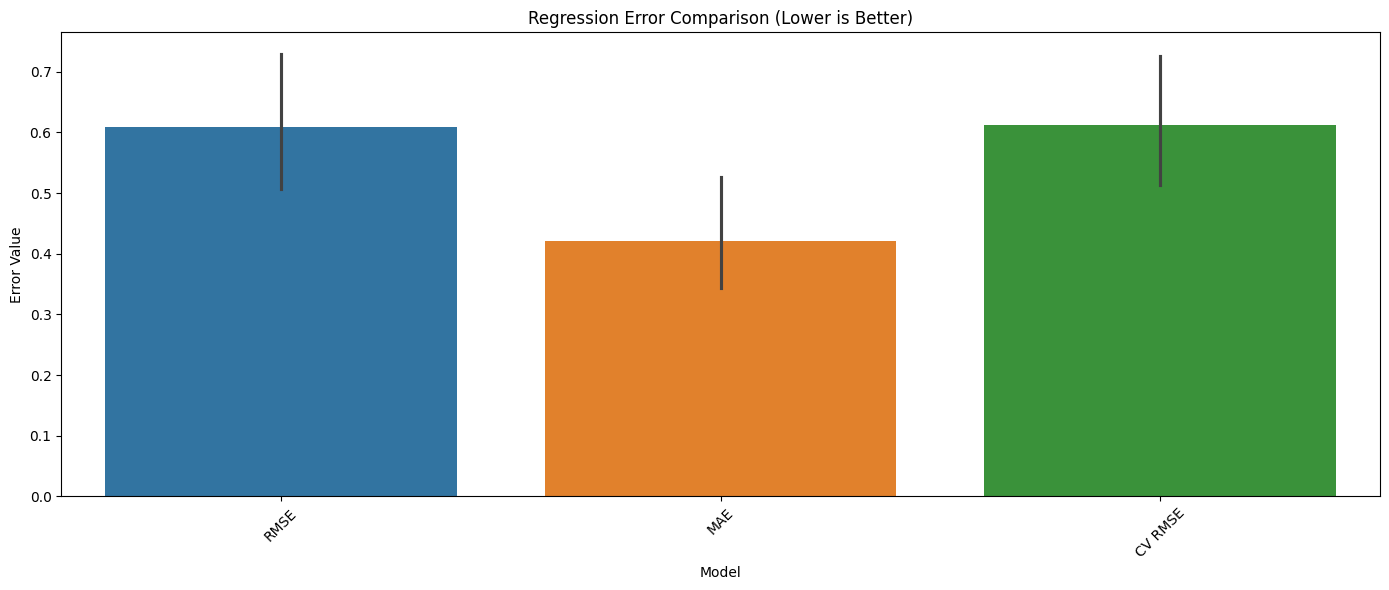

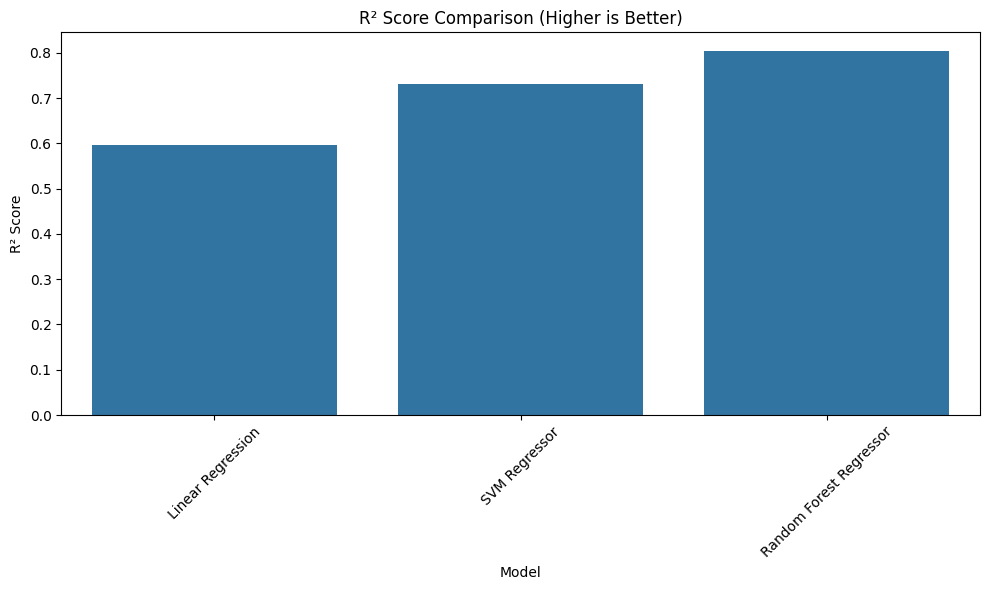

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_model_results(results):
    # Convert results dict → DataFrame for easier plotting
    import pandas as pd
    df = pd.DataFrame(results).T  # Transpose so models appear as rows

    plt.figure(figsize=(14, 6))
    sns.barplot(data=df[['RMSE', 'MAE', 'CV RMSE']])
    plt.title("Regression Error Comparison (Lower is Better)")
    plt.xlabel("Model")
    plt.ylabel("Error Value")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.barplot(x=df.index, y=df["R2 Score"])
    plt.title("R² Score Comparison (Higher is Better)")
    plt.xlabel("Model")
    plt.ylabel("R² Score")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

visualize_model_results(results)